In [1]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121, InceptionV3, MobileNet, ResNet50, Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Function to build and compile model
def build_model(base_model):
    base_model.trainable = False  # Freeze the base model for feature extraction
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

'''
List of pre-trained models
models = [DenseNet121, InceptionV3, MobileNet, ResNet50, Xception]
'''

models = [InceptionV3]

# Train models
for model_func in models:
    base_model = model_func(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = build_model(base_model)
    
    # Train the fully connected layer only
    history = model.fit(
        train_generator,
        epochs=15,
        validation_data=validation_generator
    )
    
    # Save the model
    model.save(f'{model_func.__name__}_autism_classifier.h5')


Found 2526 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


Epoch 1/15


79/79 [==============================] - 282s 3s/step - loss: 0.7306 - accuracy: 0.6477 - val_loss: 0.5844 - val_accuracy: 0.7050
Epoch 2/15
79/79 [==============================] - 238s 3s/step - loss: 0.4810 - accuracy: 0.7577 - val_loss: 0.5378 - val_accuracy: 0.7650
Epoch 3/15
79/79 [==============================] - 237s 3s/step - loss: 0.4801 - accuracy: 0.7589 - val_loss: 0.5325 - val_accuracy: 0.7600
Epoch 4/15
79/79 [==============================] - 237s 3s/step - loss: 0.4266 - accuracy: 0.7977 - val_loss: 0.5418 - val_accuracy: 0.7600
Epoch 5/15
79/79 [==============================] - 155s 2s/step - loss: 0.4029 - accuracy: 0.8084 - val_loss: 0.5279 - val_accuracy: 0.7750
Epoch 6/15
79/79 [==============================] - 218s 3s/step - loss: 0.3903 - accuracy: 0.8199 - val_loss: 0.5635 - val_accuracy: 0.7150
Epoch 7/15
79/79 [==============================] - 248s 3s/step -

C:\Users\NAMAN MAHESHWARI\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
# Evaluate the model on the validation data
test_loss, accuracy = model.evaluate(train_generator)
print('Accuracy:', accuracy)

79/79 [==============================] - 224s 3s/step - loss: 0.1094 - accuracy: 0.9695
Accuracy: 0.9695170521736145


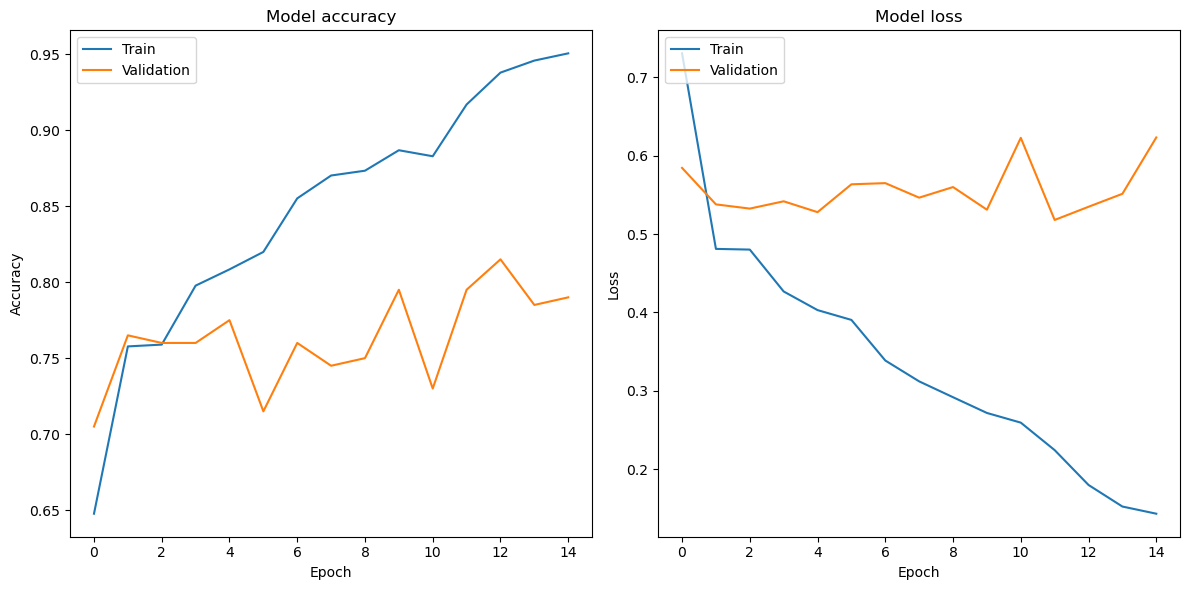

In [3]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

END